In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from tabulate import tabulate
import matplotlib
import piecewise_regression
import json

In [2]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def decimal(x):
    return x.replace(',', '.').encode()

def sum_err(x,sx):
    return np.sum(x),np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def diff_err(x,sx):
    return x[0]-x[1],np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def times_err(x,sx):
    return np.prod(x), np.prod(x)*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))

#def frac_err(x,sx):
#    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum((sx/x)**2))

def frac_err(x,sx):
    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))
    #return [np.sum((i/j)**2) for i,j in zip(sx,x)]

In [3]:
def load_txt(name):
    t,pos = np.genfromtxt((decimal(x) for x in open(name)),unpack = True, skip_header=4)
    return t, pos

# ULOHA 1 - kalibracni blbost

In [22]:
t100 = 99.8
t0 = 0.6

In [25]:
a = 100/(t100 - t0)
b = -0.6*a
print("T = {}t + {}".format(a,b))

T = 1.0162601626016259t + -0.6097560975609755


In [35]:
def temp(t):
    return 100/99.2*t - 0.6*100/99.2

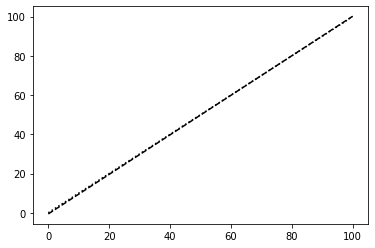

In [151]:
x_range = np.linspace(0,100,200)

plt.plot(x_range, temp(x_range), linestyle = 'dashed', color = 'k')
plt.plot(x_range, x_range, linestyle = 'dotted', color = 'k')

In [38]:
temp(99.8)

99.99999999999999

# ULOHA 3

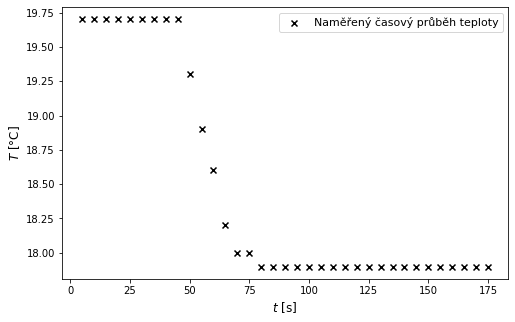

In [9]:
###### GRAF PRO STRIBRNEJ VALECEK #########

t1, T1 = load_txt('data/stribrny.txt')

x_range = np.linspace(0,100,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x', label = 'Naměřený časový průběh teploty')
#plt.plot(t1, T1, color = 'k', linestyle = 'dotted')

plt.legend(loc='upper right', fontsize=11)

#popisky os
plt.ylabel("$T$ [°C]", fontsize=12)
plt.xlabel("$t$ [s]", fontsize=12)

plt.savefig('ukazka_valecek.pdf', bbox_inches = 'tight')
plt.show()

# ULOHA 4 - VYPAROVANI

In [150]:
ta, Ta = load_txt('data/var.txt')
tb, Tb = load_txt('data/varkonst.txt')

T1 = np.concatenate((Ta,Tb))

t1 = np.arange(0,1245,5)
T1

array([14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9,
       14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9,
       14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9,
       14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9,
       14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9, 14.9,
       15. , 14.9, 14.9, 14.9, 15. , 15. , 15. , 15. , 15. , 15. , 15. ,
       15. , 15. , 15. , 15. , 15. , 15. , 15. , 15. , 15. , 15. , 15. ,
       15. , 15. , 15. , 15. , 15. , 15.1, 15. , 15. , 15.1, 15.1, 15.1,
       15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1,
       15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 15.1,
       15.1, 15.1, 15.1, 15.1, 15.2, 15.2, 15.2, 15.2, 15.2, 15.2, 15.2,
       15.2, 15.2, 15.2, 15.2, 15.2, 15.2, 15.2, 15.2, 15.6, 16.4, 17. ,
       17.6, 18.3, 18.9, 19.7, 20.1, 20.4, 20.6, 20.7, 20.9, 23. , 24.3,
       25.7, 27.2, 28.2, 28.7, 28.9, 29.3, 29.7, 30

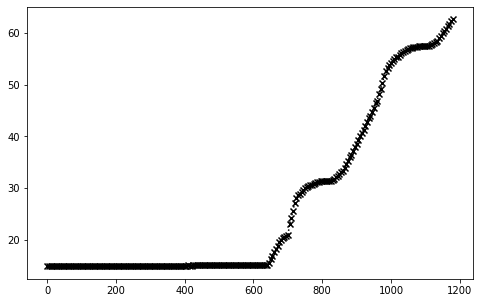

In [149]:

x_range = np.linspace(0,100,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x')
plt.plot(t1, T1, color = 'k', linestyle = 'dotted')

# ULOHA 5 TANI

## DATA

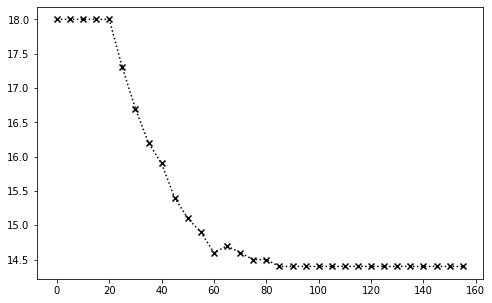

In [113]:
t1, T1 = load_txt('data/led.txt')

x_range = np.linspace(0,100,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x')
plt.plot(t1, T1, color = 'k', linestyle = 'dotted')

In [114]:
T1

array([18. , 18. , 18. , 18. , 18. , 17.3, 16.7, 16.2, 15.9, 15.4, 15.1,
       14.9, 14.6, 14.7, 14.6, 14.5, 14.5, 14.4, 14.4, 14.4, 14.4, 14.4,
       14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4])

In [115]:
# ROZDELENI DAT NA PRED BEHEM A PO


before = temp(np.array([18. , 18. , 18. , 18. , 18. ]))

during = temp(np.array([17.3, 16.7, 16.2, 15.9, 15.4, 15.1,
       14.9, 14.6, 14.7, 14.6, 14.5, 14.5]))

after = temp(np.array([14.4, 14.4, 14.4, 14.4, 14.4,
       14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4, 14.4]))

t_after = t1[17:]
t_before = t1[:5]
t_during = t1[5:17]


In [116]:
T1 = temp(T1) #### PREVOD KALIBRACNI KRIVKOU

In [117]:
def linear_func(x,i,j):
    return i*x + j

params, err = curve_fit(linear_func, t_after, after)

a1,b1 = params
a1,b1

(-2.180732708924817e-12, 13.911290322839319)

In [118]:
params, err = curve_fit(linear_func, t_before, before)

a2,b2 = params
a2,b2

c:\users\stepa\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(-2.1811441541785825e-12, 17.54032258066697)

## GRAF

In [119]:
a1,b1

(-2.180732708924817e-12, 13.911290322839319)

In [120]:
a2,b2

(-2.1811441541785825e-12, 17.54032258066697)

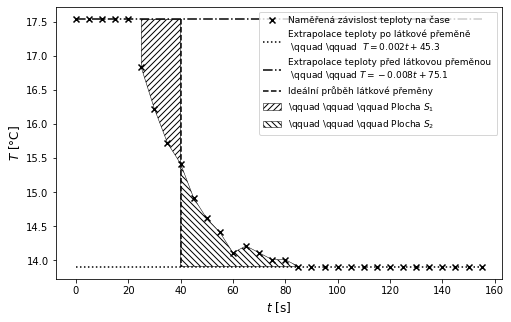

In [134]:
x_range = np.linspace(0,155,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x', label = "Naměřená závislost teploty na čase")

plt.plot(x_range, a1*x_range+b1, color = 'k', linestyle = 'dotted', label = "Extrapolace teploty po látkové přeměně \n \qquad \qquad  $T = 0.002t + 45.3$")
plt.plot(x_range, a2*x_range+b2, color = 'k', linestyle = 'dashdot',  label = "Extrapolace teploty před látkovou přeměnou \n \qquad \qquad $T = -0.008t + 75.1$")


t = 40 ### CAS ODHADNUTY PRO IDEALNI PRHUBEH

plt.plot(np.full(100,t), np.linspace(a2*t + b2,a1*t + b1,100), color = 'k', linestyle = 'dashed', label = "Ideální průběh látkové přeměny")

plt.fill_between(t1[5:9], T1[5:9], a2*t1[5:9]+b2, color='k', facecolor="none", hatch = '////', linewidth=0.5, label = "\qquad \qquad \qquad Plocha $S_1$")
plt.fill_between(t1[8:18], a1*t1[8:18]+b1, T1[8:18], color='k', facecolor="none", hatch = r"\\\\", linewidth=0.5, label = "\qquad \qquad \qquad Plocha $S_2$")


handles, labels = plt.gca().get_legend_handles_labels()
order = [3,0,1,2,4,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right', fontsize=9)

#popisky os
plt.ylabel("$T$ [°C]", fontsize=12)
plt.xlabel("$t$ [s]", fontsize=12)

plt.savefig('tani.pdf', bbox_inches = 'tight')
plt.show()